In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import pandas as pd
from fastai.vision.all import *
from fastai.vision.core import *
from ipywidgets import widgets
from tensorflow import keras
from tensorflow.keras.applications import imagenet_utils
from keras import applications
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tqdm.notebook import tqdm 
from time import sleep
from IPython.display import  Image
from keras import layers
from keras.models import Model
import keras.backend as K


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

### **Model**

In [2]:
#path 
path = Path('/kaggle/input/pnevmoniya/train')
fls = get_image_files(path)
#failed = verify_images(path)

# Funksiya tuzib olamiz
def is_pnevmoniya(x): return x[0].islower()
# Data block tuzamiz
pnevmoniya = DataBlock( 
            blocks = (ImageBlock, CategoryBlock),
            get_items = get_image_files,
            splitter = RandomSplitter(valid_pct=0.2, seed=42),
            get_y = parent_label,
            item_tfms=Resize(224)
)
#Dataloader tuzamiz

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, 
    label_func=is_pnevmoniya, item_tfms=Resize(224))

#Datasetni tekshirish
#dls.train.show_batch(max_n=32, nrows=4)
learn = vision_learner(dls,resnet152, metrics=accuracy)
learn.fine_tune(30)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.401341,0.293123,0.923298,02:06


epoch,train_loss,valid_loss,accuracy,time
0,0.141863,0.078628,0.976989,01:55
1,0.079597,0.073670,0.979866,01:55
2,0.047367,0.074801,0.981783,01:57
3,0.064412,0.291818,0.935762,01:56
4,0.054138,0.044198,0.983701,01:56
5,0.041711,0.126607,0.976989,01:56
6,0.049722,0.126826,0.972196,01:56
7,0.044710,0.071005,0.977948,01:55
8,0.031404,0.043993,0.983701,01:54
9,0.036249,0.059228,0.983701,01:54


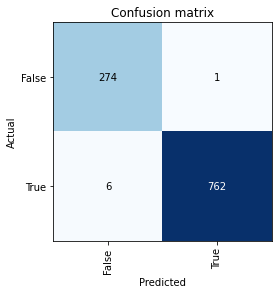

In [3]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

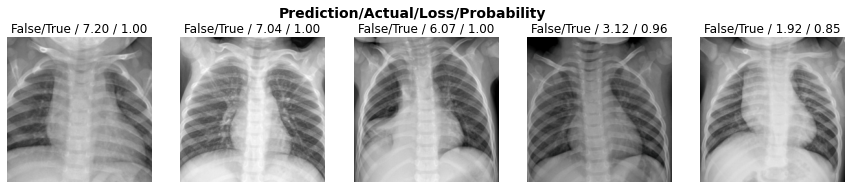

In [4]:
interp.plot_top_losses(5, nrows=1)

### **Modelni tekshirish**


In [5]:
#from ipywidgets import widgets
#upload = widgets.FileUpload()
#upload

In [6]:
#img = PILImage.create(upload.data[-1])
#pred, pred_id, probs = learn.predict(img)
#print(f'Prognoz:{pred}')
#print(f'Ehtimollik:{probs[pred_id]*100: .1f}%')
#img

In [7]:
files = !ls "../input/pnevmoniya/test"
preds = []
preds_id = []
for file in tqdm(files):
    number, n_th, probs = learn.predict(f"../input/pnevmoniya/test/{file}")
    preds.append(n_th)
    preds_id.append(number)

  0%|          | 0/624 [00:00<?, ?it/s]

In [8]:
#def boolstr_to_int(v):
#    if v=='PNEUMONIA':
#        return '1'
#    elif v=='NORMAL':
#        return '0'
#new_data = np.vectorize(boolstr_to_int)(preds_id).astype(int)
#new_data
        

In [9]:
def boolstr_to_int(v):
    if v=='True':
        return '1'
    elif v=='False':
        return '0'
new_data = np.vectorize(boolstr_to_int)(preds_id).astype(int)
new_data

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head(5)

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [11]:
df['labels'] = new_data

In [12]:
df['labels']

0      1
1      0
2      0
3      1
4      0
      ..
619    1
620    1
621    1
622    1
623    1
Name: labels, Length: 624, dtype: int64

In [13]:
df.to_csv('submission.csv', index=False)

In [14]:
#os.remove("/kaggle/working/pnevmoniya3.2.csv") 

In [15]:
pd.read_csv('submission.csv')

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,1
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,1
